In [2]:
from lifelines import KaplanMeierFitter
from matplotlib import pyplot as plt
import pandas as pd
kmf = KaplanMeierFitter()

In [52]:
#df = pd.read_csv('/Users/mashihao/Desktop/SNF2/results/GBM/allEmbedding.csv', index_col=0)
#df = pd.read_csv('/Users/mashihao/Desktop/SNF2/results/BRCA/allEmbedding.csv', index_col=0)
df = pd.read_csv('/Users/mashihao/Desktop/SNF2/results/LUAD/allEmbedding.csv', index_col=0)

#df = pd.read_csv('/Users/mashihao/Desktop/SNF2/results/SKCM/allEmbedding.csv', index_col=0)
#df = pd.read_csv('/Users/mashihao/Desktop/SNF2/results/KIRC/allEmbedding.csv', index_col=0)

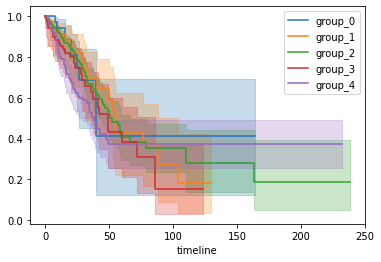

In [54]:
ax = plt.subplot(111)

T = df["timetoevent"]
E = df["event"]
G = df["spectral"]

for i in range(5):
    group = (G == i)
    kmf.fit(T[group], event_observed=E[group], label="group_{}".format(i))
    kmf.plot_survival_function(ax=ax)

In [55]:
from lifelines.statistics import pairwise_logrank_test, multivariate_logrank_test


results = multivariate_logrank_test(T, G, E)

results.print_summary()

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 4
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           6.29 0.18      2.49

In [56]:
results.p_value

0.17861031252721862

In [57]:
results_pair = pairwise_logrank_test(T, G, E)

results_pair.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
     test_statistic    p  -log2(p)
0 1            0.01 0.93      0.11
  2            0.04 0.84      0.24
  3            0.60 0.44      1.19
  4            2.24 0.13      2.89
1 2            0.00 0.96      0.06
  3            0.99 0.32      1.64
  4            1.91 0.17      2.59
2 3            1.08 0.30      1.75
  4            4.87 0.03      5.20
3 4            0.47 0.49      1.01

In [60]:
pd.set_option('display.max_rows', None)
l = df[df["spectral"]==2].index
print(len(l))
for item in l:
    print(item)

212
TCGA-3C-AAAU
TCGA-3C-AALI
TCGA-3C-AALJ
TCGA-3C-AALK
TCGA-4H-AAAK
TCGA-5L-AAT0
TCGA-5L-AAT1
TCGA-5T-A9QA
TCGA-A1-A0SB
TCGA-A2-A04Q
TCGA-A2-A0CK
TCGA-A2-A0CO
TCGA-A2-A0CR
TCGA-A2-A0EP
TCGA-A2-A0ES
TCGA-A2-A1G6
TCGA-A2-A3KC
TCGA-A2-A3XW
TCGA-A2-A4RW
TCGA-A2-A4RY
TCGA-A2-A4S0
TCGA-A2-A4S1
TCGA-A2-A4S2
TCGA-A2-A4S3
TCGA-A7-A13H
TCGA-A7-A3IY
TCGA-A7-A3IZ
TCGA-A7-A3J0
TCGA-A7-A3J1
TCGA-A7-A3RF
TCGA-A7-A425
TCGA-A7-A426
TCGA-A7-A4SA
TCGA-A7-A4SB
TCGA-A7-A4SE
TCGA-A7-A4SF
TCGA-A7-A56D
TCGA-A7-A5ZX
TCGA-A7-A6VX
TCGA-A8-A08H
TCGA-A8-A09Z
TCGA-AC-A23G
TCGA-AC-A2FE
TCGA-AC-A2FF
TCGA-AC-A2FK
TCGA-AC-A2FO
TCGA-AC-A3BB
TCGA-AC-A3HN
TCGA-AC-A3OD
TCGA-AC-A3QQ
TCGA-AC-A3TM
TCGA-AC-A3TN
TCGA-AC-A3W6
TCGA-AC-A3W7
TCGA-AC-A3YI
TCGA-AC-A4ZE
TCGA-AC-A5XS
TCGA-AC-A5XU
TCGA-AC-A62V
TCGA-AC-A62Y
TCGA-AC-A6IV
TCGA-AC-A6IX
TCGA-AC-A6NO
TCGA-AC-A7VB
TCGA-AC-A8OP
TCGA-AC-A8OQ
TCGA-AC-A8OR
TCGA-AC-A8OS
TCGA-AN-A0FN
TCGA-AO-A03U
TCGA-AO-A0JC
TCGA-AO-A12H
TCGA-AO-A1KO
TCGA-AQ-A54O
TCGA-AQ-A7U7
TCGA-AR-A1AM
TCGA-AR-

In [48]:
from lifelines import CoxPHFitter

dfA = pd.DataFrame({'E': E[(G == 1)], 'T': T[(G == 1)], 'groupA': 1})
dfB = pd.DataFrame({'E': E[(G == 0)], 'T': T[(G == 0)], 'groupA': 0})
df = pd.concat([dfA, dfB])

cph = CoxPHFitter().fit(df, 'T', 'E')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 884 total observations, 752 right-censored observations>
             duration col = 'T'
                event col = 'E'
      baseline estimation = breslow
   number of observations = 884
number of events observed = 132
   partial log-likelihood = -725.10
         time fit was run = 2021-05-18 23:05:35 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
groupA     -0.08       0.92       0.21            -0.50             0.34                 0.61                 1.40

              z    p   -log2(p)
covariate                      
groupA    -0.38 0.70       0.51
---
Concordance = 0.47
Partial AIC = 1452.20
log-likelihood ratio test = 0.15 on 1 df
-log2(p) of ll-ratio test = 0.51